# Nonlinear regression

<br>
In nature many processess are non-linear, especialy many biological processes like concentration of enzymes during enzymatic reaction or a bacterial culture growt. Such processes can be modeled using an equation with non-linear parameters, for example:
<br><br>
$
Y = \frac{α + \beta X}{1 + γX}
$
<br><br>
example of exponential parameters:
<br><br>
$
Y = \alpha + β e^{\gamma X}
$

<br><br>
Sometimes non-linear function can be modified to mimic a linear form:
<br><br>
$
y = \frac{\alpha x}{\beta + x}
$
<br><br>
can be written as:
<br>
$
\frac{1}{y} = \frac{1}{\alpha} + (\frac{\beta}{\alpha}) \frac{1}{x}
$

## Examples of non-linear regression models

## Logistic regression model
<br>
$
y = logit(x) = log(\frac{x}{1-x})
$

This type of models are used for categorical type of data, dependent valus are  categorical.
<br><br>

### Binary logistic models
<br>
Only two possible outcomes - yes or no, 0 / 1. For example, a tumor is benign or malignant.
<br><br>

### Multinomial logistic models
<br>
These models have three or more possible outcomes. For example types of fruits - apples, pears, oranges, cherries...
<br><br>

### Ordinal logistic models
<br>
These models have three or more possible outcomes, but these categories are ordered. For example ratings of movies.

<br>

Example:
<br>
Data from UCLA which has four columns: admit, GRE score, GPA, rank of undergrad school
<br>
We want to build a model that would predict whether student will get admitted given his profile.

In [ ]:
url <- 'https://stats.idre.ucla.edu/stat/data/binary.csv'
df <- read.table(url, sep=',', header=T)
head(df, 5)
dim(df)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4


[1] 400   4

In [ ]:
summary(df)

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

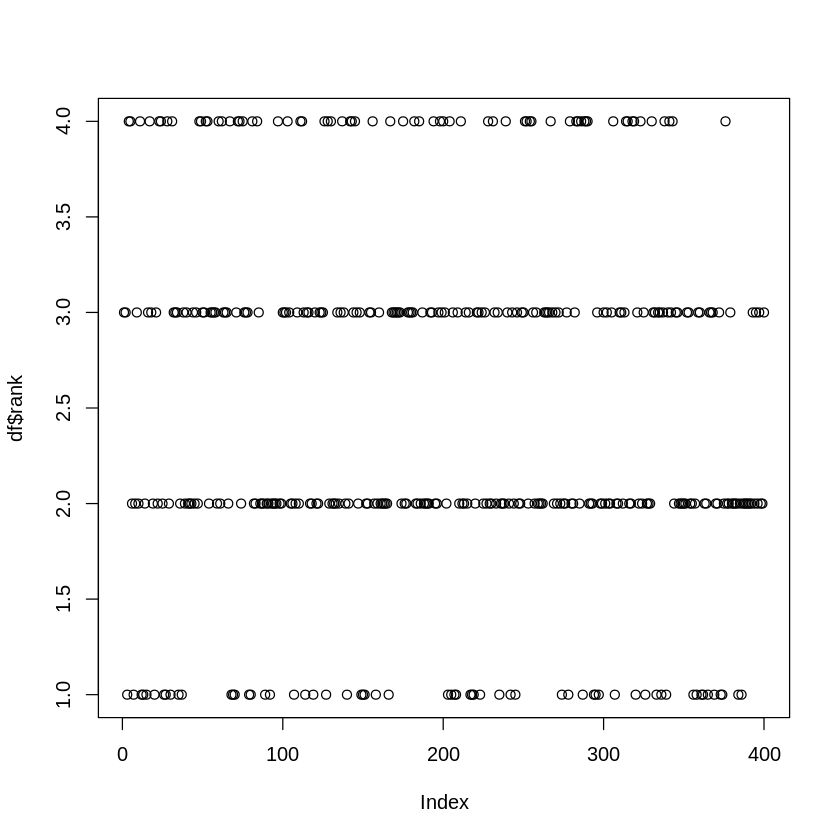

In [ ]:
plot(df$rank)

In [ ]:
table(df$admit)


  0   1 
273 127 

In [ ]:
# Let's check how are admits distributed considering rank column
xtabs(~ admit + rank, data=df)

     rank
admit  1  2  3  4
    0 28 97 93 55
    1 33 54 28 12

If there was not enough data in individual ranks, we could as well omit these data from the analysis.

We will use R **GLM** model - generalised linear model. GLM does not assume a linear relationship between the dependent and independent variables. But its does assume a linear relationship between thransformed expected response in terms of the link function and the independent variables.
<br><br>
There are three components to any GLM:
<br>
1. Random Component - specifies the probability distribution of the response variable; e.g., normal distribution for  in the classical regression model, or binomial distribution for  in the binary logistic regression model. This is the only random component in the model; there is not a separate error term.
<br>
2. Systematic Component - specifies the explanatory variables  in the model, more specifically, their linear combination; e.g., , as we have seen in a linear regression, and as we will see in the logistic regression in this lesson.
<br>
3. Link Function,  or  - specifies the link between the random and the systematic components. It indicates how the expected value of the response relates to the linear combination of explanatory variables; e.g.,  for classical regression, or  for logistic regression.
*(from: https://online.stat.psu.edu/stat504/lesson/6/6.1)*

Log-Odds
<br>
What are Odds? It is a probability of success / failure, expressed as ratio. For example 60% probability of sunny weather is accompanied by 40% probability of rain, expressed in Odds = $ \frac{60}{40} = 1.5 $
<br>
And if we take a logaritm of Odds we will get Log-Odds => ln(1.5) = 0.41
<br>
Log-Odds are used because they are symmetrical around zero, which is a nice characteristic for analysis.

In [ ]:
df$rank <- as.factor(df$rank)

set.seed(0)
# use 75% of dataset as training set and 25% as test set
sample <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.75, 0.35))
train  <- df[sample, ]
test   <- df[!sample, ]

In [ ]:
# https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/glm


model <- glm(admit ~ gre + gpa + rank, data=train, family="binomial")
summary(model)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6364  -0.8823  -0.6256   1.0439   2.0437  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.790721   1.367766  -3.503 0.000461 ***
gre          0.002293   0.001306   1.756 0.079109 .  
gpa          1.070064   0.396827   2.697 0.007006 ** 
rank2       -0.871512   0.384021  -2.269 0.023242 *  
rank3       -1.435573   0.411913  -3.485 0.000492 ***
rank4       -1.538888   0.481583  -3.195 0.001396 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 351.65  on 279  degrees of freedom
Residual deviance: 317.74  on 274  degrees of freedom
AIC: 329.74

Number of Fisher Scoring iterations: 4


Explanation:
<br>
*   gre - one unit change  will increase the chance of getting admitted by 0.0023. Although the p-value is not the best, but still significant.
*   gpe - similar situation as with gre, p-value is not the best, but it still support the change in gpe by one with Log-Odds of 0.8.
*   different situation is with the ranks with each rank the Log-Odds ration decreases.

Intercept indicates the log of odds of the whole population of being admitted, can be converted back to probability using sigmoid function.
Null deviance vs Residual deviance, the higher the difference the better the fit of the model. Null deviance is the value where there would be only intercept in the equation, while residual deviance is value with all variables.

In [ ]:
# Log-Odds confidence Intervals for each variable

confint(model)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-7.551130253,-2.171361920
gre,-0.000242499,0.004893228
gpa,0.304900160,1.865753556
rank2,-1.634895342,-0.123655806
rank3,-2.260684698,-0.639911643
rank4,-2.517695582,-0.618787204


In [ ]:
# now, we can have a new student that wants to be admitted
# let's look at his / her profile

x <- data.frame(gre=690, gpa=3.2, rank=as.factor(1))
p <- predict(model, x, type='response')
print(paste('A new student has a chance of admission of', round(p, 2), '%'))


[1] "A new student has a chance of admission of 0.55 %"


In [ ]:
# what parameters should this student focus on if he / she wanted to get better chance?
# change only one parameter


x <- data.frame(gre=690, gpa=4.2, rank=as.factor(1))
p <- predict(model, x, type='response')
print(paste('A new student has a chance of admission of', round(p, 2), '%'))


[1] "A new student has a chance of admission of 0.78 %"


How good is our model? Let's find out:

In [ ]:
# the model predicts log-odds/probabilities

predicted_log_ods <- predict(model, test[, 2:dim(df)[2]])
predicted_proba <- predict(model, test[, 2:dim(df)[2]], type="response")
head(predicted_log_ods, 5)
head(predicted_proba, 5)

1          5          7          8         14 
-1.4920180 -2.0019550 -0.3178437 -1.4492303 -0.7613276

1         5         7         8        14 
0.1836190 0.1189978 0.4212013 0.1901200 0.3183581

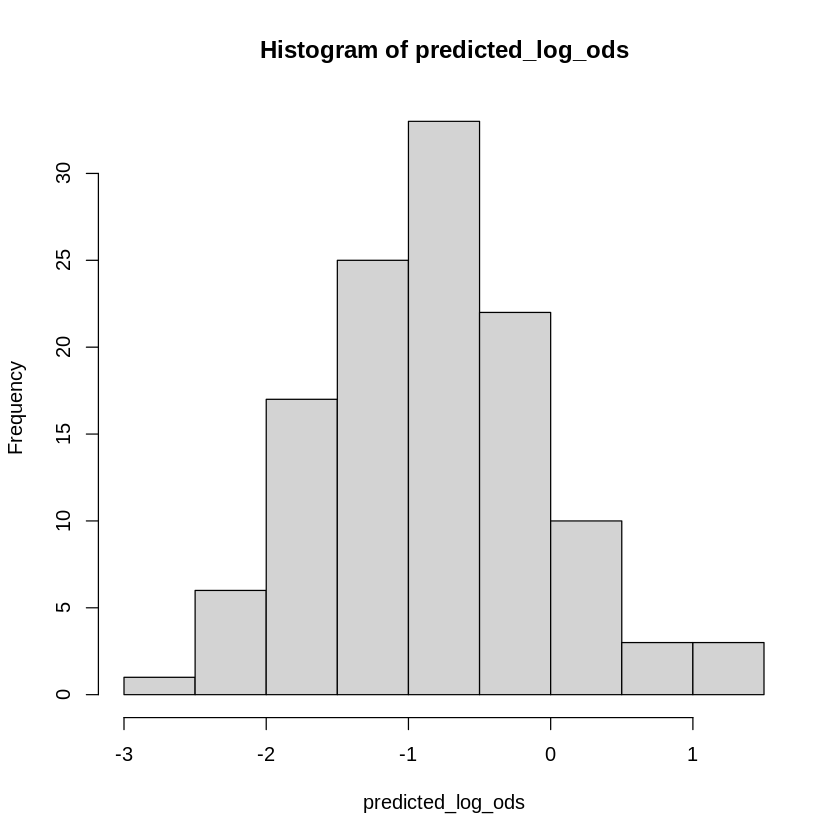

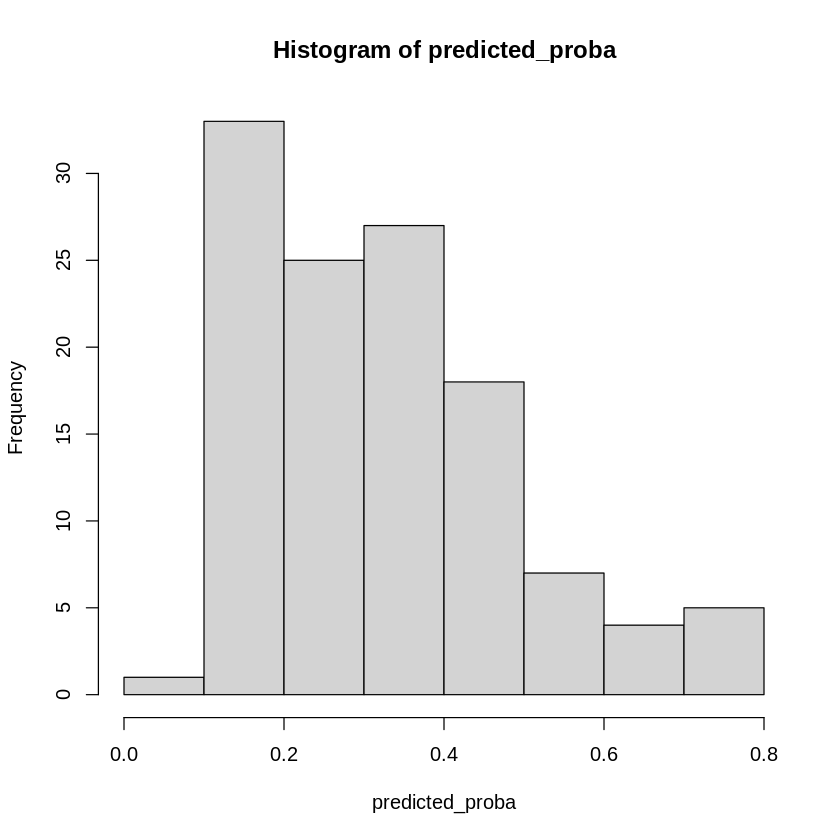

In [ ]:
# let's look at distribution of predicted probabilites

hist(predicted_log_ods)
hist(predicted_proba)

In [ ]:
# we can convert probabilities to classes

predicted <- ifelse(predicted_proba >= 0.5, 1, 0)

# Generating the classification table
ctab <- table(test$admit, predicted)
ctab

   predicted
     0  1
  0 73 10
  1 31  6

In [ ]:
# Accuracy = (TP + TN)/(TN + FP + FN + TP)
# Accuracy in Test dataset

accuracy <- round(sum(diag(ctab))/sum(ctab)*100, 2)
print(paste('Accuracy on the testset: ', accuracy))

[1] "Accuracy on the testset:  65.83"


In [ ]:
# Same procedure on train set

predicted_log_ods <- predict(model, train[, 2:dim(df)[2]])
predicted_proba <- predict(model, train[, 2:dim(df)[2]], type="response")
predicted <- ifelse(predicted_proba >= 0.5, 1, 0)
ctab <- table(train$admit, predicted)
ctab

accuracy <- round(sum(diag(ctab))/sum(ctab)*100, 2)
print(paste('Accuracy on the trainset: ', accuracy))

   predicted
      0   1
  0 175  15
  1  60  30

[1] "Accuracy on the trainset:  73.21"


## Generalized Additive model
<br>

GAM are flexible models that tries to describe a relationship between independent and dependent variable without a need for specific mathematical form. How is it done? The algorithm tries to fit a curve using an equation that consists of several predictors depend linearly or non-linearly on some Smooth non-linear functions like splines or polynomials:
<br><br>
$
y_i = α +f1(x_{i1}) +f2(x_{i2}) +….fp(x_{ip}) +ϵi
$
<br>
where $f_1, f_2, f_p$ are different non-linear functions on $X_p$.

In [ ]:
install.packages('faraway')
library(faraway)

# Ozone readings in LA
# https://github.com/julianfaraway/faraway

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(ozone)
head(ozone, 5)

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,5710,4,28,40,2693,-25,87,250,33
2,5,5700,3,37,45,590,-24,128,100,34
3,5,5760,3,51,54,1450,25,139,60,35
4,6,5720,4,69,35,1568,15,121,60,36
5,4,5790,6,19,45,2631,-33,123,100,37


In [ ]:
summary(ozone)

       O3              vh            wind           humidity    
 Min.   : 1.00   Min.   :5320   Min.   : 0.000   Min.   :19.00  
 1st Qu.: 5.00   1st Qu.:5690   1st Qu.: 3.000   1st Qu.:47.00  
 Median :10.00   Median :5760   Median : 5.000   Median :64.00  
 Mean   :11.78   Mean   :5750   Mean   : 4.848   Mean   :58.13  
 3rd Qu.:17.00   3rd Qu.:5830   3rd Qu.: 6.000   3rd Qu.:73.00  
 Max.   :38.00   Max.   :5950   Max.   :11.000   Max.   :93.00  
      temp            ibh              dpg              ibt       
 Min.   :25.00   Min.   : 111.0   Min.   :-69.00   Min.   :-25.0  
 1st Qu.:51.00   1st Qu.: 877.5   1st Qu.: -9.00   1st Qu.:107.0  
 Median :62.00   Median :2112.5   Median : 24.00   Median :167.5  
 Mean   :61.75   Mean   :2572.9   Mean   : 17.37   Mean   :161.2  
 3rd Qu.:72.00   3rd Qu.:5000.0   3rd Qu.: 44.75   3rd Qu.:214.0  
 Max.   :93.00   Max.   :5000.0   Max.   :107.00   Max.   :332.0  
      vis             doy       
 Min.   :  0.0   Min.   : 33.0  
 1st Qu.: 

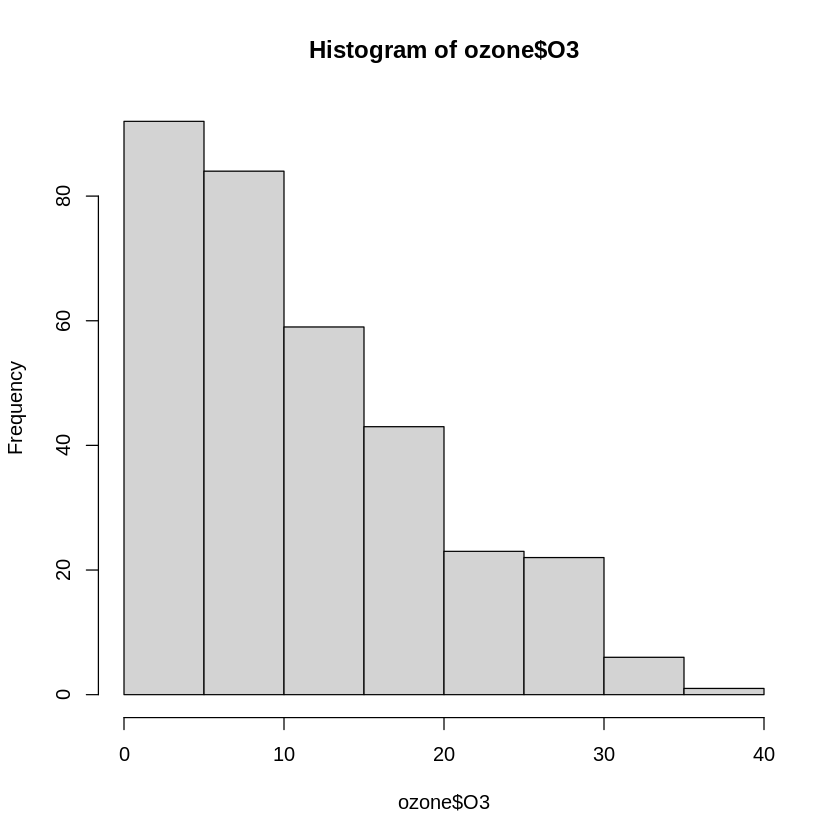

In [ ]:
hist(ozone$O3)

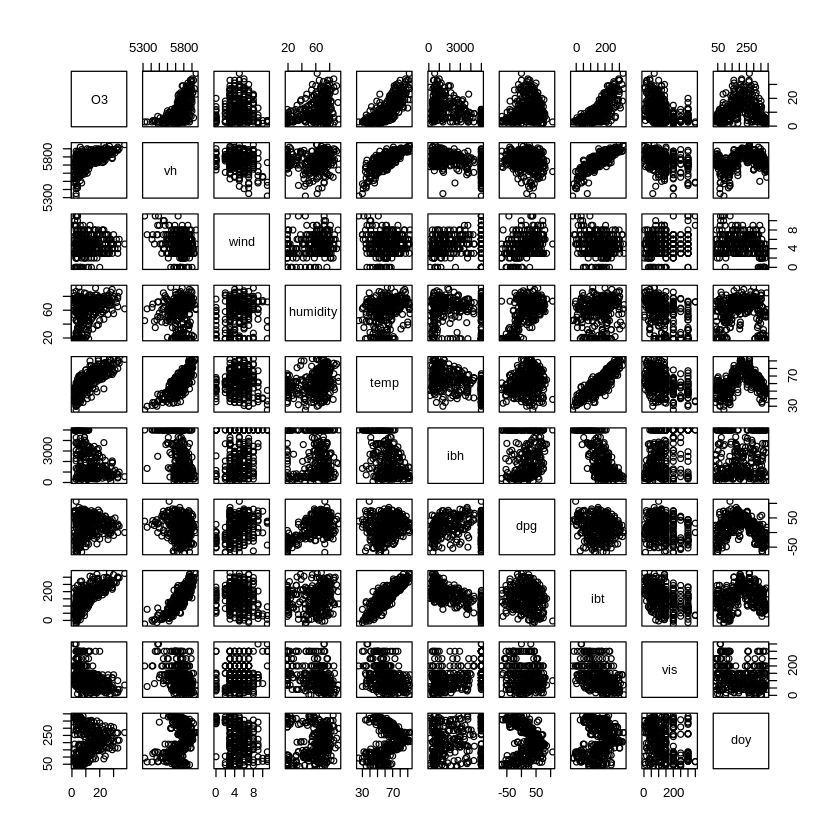

In [ ]:
pairs(ozone)

[1] 330   4

[1] 330   4

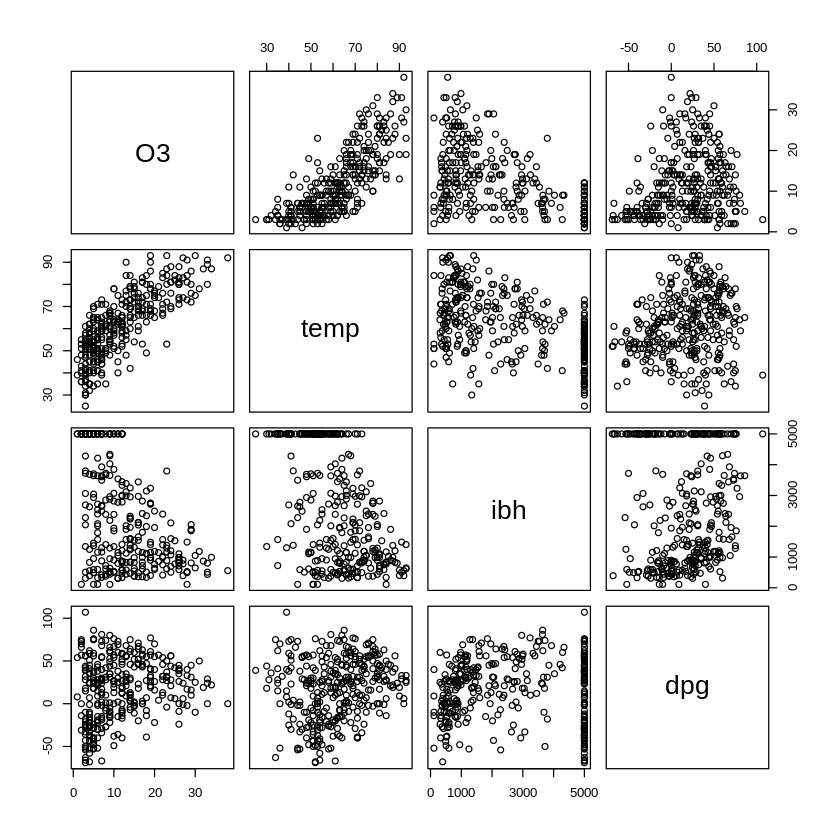

In [ ]:
# we will use only three predictors:
# temp - temperature measured at El Monte
# ibh - inversion base height at LAX
# dpg - inversion top temperature at LAX 
# as function we will use a loess smoother (locally estimated scatterplot smoothing) lo()

ozone <- ozone[c('O3', 'temp', 'ibh', 'dpg')]
dim(ozone)
ozone <- na.omit(ozone)
dim(ozone)

pairs(ozone)

In [ ]:
# install.packages('gam')
library(gam)

In [ ]:
# use 75% of dataset as training set and 25% as test set
sample <- sample(c(TRUE, FALSE), nrow(ozone), replace=TRUE, prob=c(0.75, 0.35))
train_o3  <- ozone[sample, ]
test_o3   <- ozone[!sample, ]

model <- gam(O3 ~ lo(temp) + lo(ibh) + lo(dpg), data=train_o3)
model

Call:
gam(formula = O3 ~ lo(temp) + lo(ibh) + lo(dpg), data = train_o3)

Degrees of Freedom: 208 total; 196.8419 Residual
Residual Deviance: 3735.165 

In [ ]:
summary(model)


Call: gam(formula = O3 ~ lo(temp) + lo(ibh) + lo(dpg), data = train_o3)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-13.2400  -2.6106  -0.1836   2.1646  12.8286 

(Dispersion Parameter for gaussian family taken to be 18.9755)

    Null Deviance: 13344.05 on 208 degrees of freedom
Residual Deviance: 3735.166 on 196.8419 degrees of freedom
AIC: 1222.024 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
              Df Sum Sq Mean Sq  F value    Pr(>F)    
lo(temp)    1.00 6812.6  6812.6 359.0243 < 2.2e-16 ***
lo(ibh)     1.00  484.5   484.5  25.5321 9.905e-07 ***
lo(dpg)     1.00   32.1    32.1   1.6936    0.1947    
Residuals 196.84 3735.2    19.0                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F     Pr(F)    
(Intercept)                             
lo(temp)        2.5 8.2137 0.0001114 ***
lo(ibh)         3.0 5.1408 0.0018259 ** 
lo(dpg)     

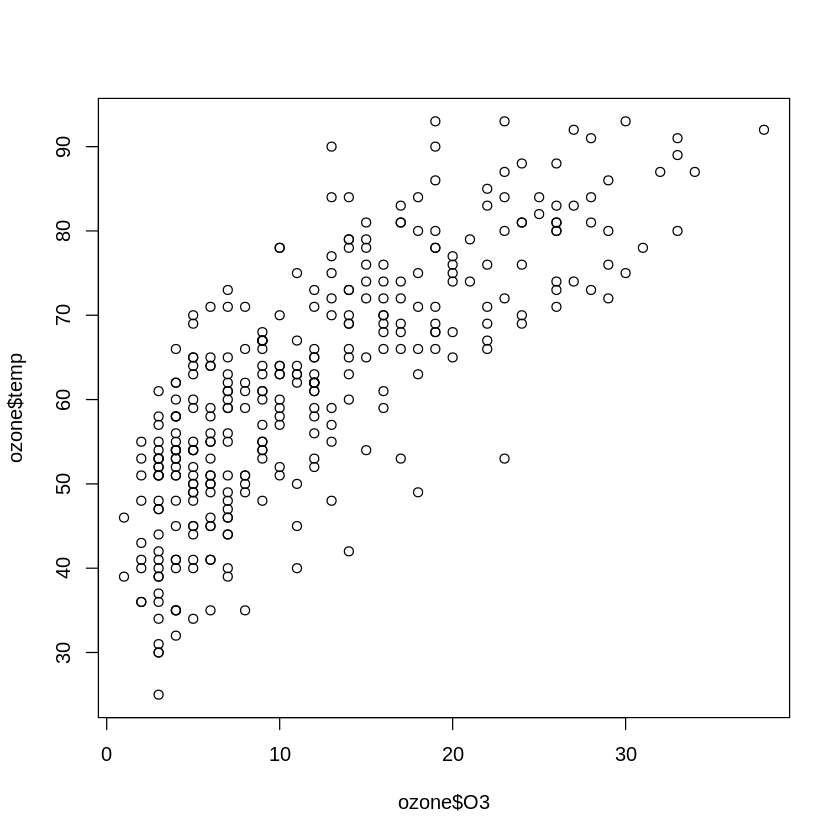

In [ ]:
plot(ozone$O3, ozone$temp)

In [ ]:
# names(model) 

r2 <- 1 - model$deviance/model$null.deviance
r2 

[1] 0.7200875

In [ ]:
# compute r squared

r2 <- function (x, y) cor(x, y)^2

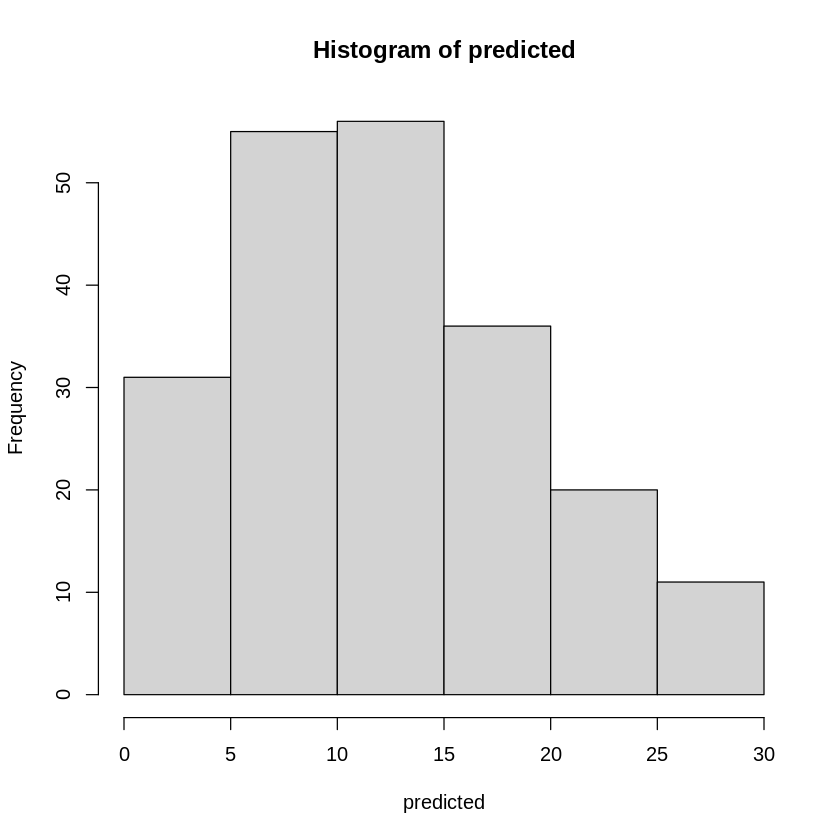

[1] "R2 on the trainset:  0.720143775321683"


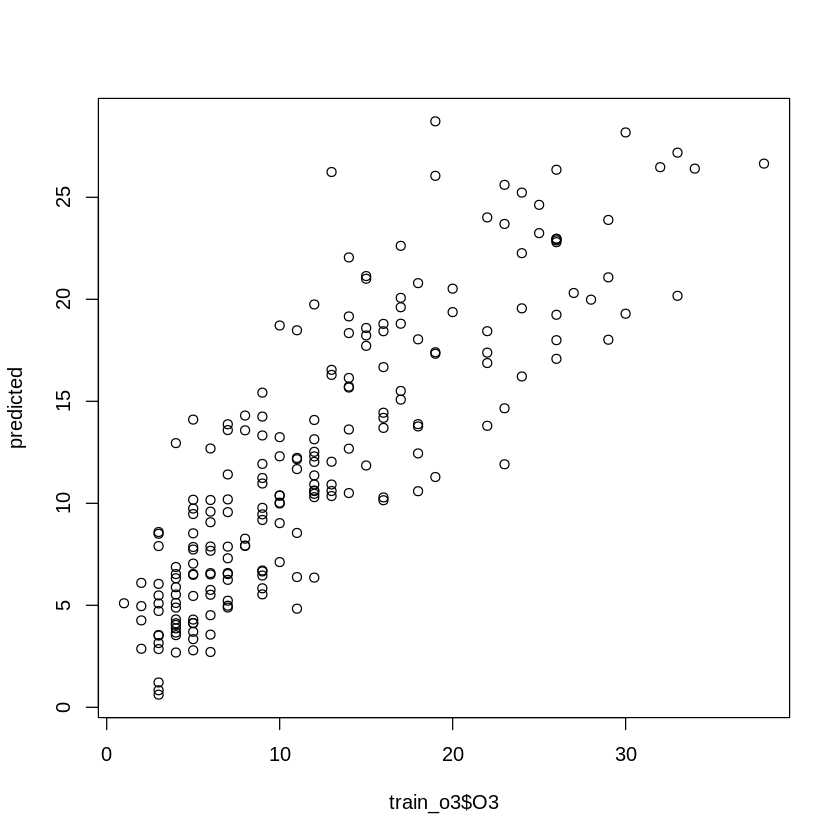

In [ ]:
# Results on the train set

predicted <- predict(model, train_o3[, -1], type="response")
# predicted <- ifelse(predicted_proba >= 0.5, 1, 0)
hist(predicted)
plot(train_o3$O3, predicted)

print(paste('R2 on the trainset: ', r2(train_o3$O3, predicted)))

Warning message in gam.lo(data[["lo(temp)"]], z, w, span = 0.5, degree = 1, ncols = 1, :
“eval  25”
Warning message in gam.lo(data[["lo(temp)"]], z, w, span = 0.5, degree = 1, ncols = 1, :
“lowerlimit  29.685”
Warning message in gam.lo(data[["lo(temp)"]], z, w, span = 0.5, degree = 1, ncols = 1, :
“extrapolation not allowed with blending”


[1] "R2 on the testset:  0.765295189115551"


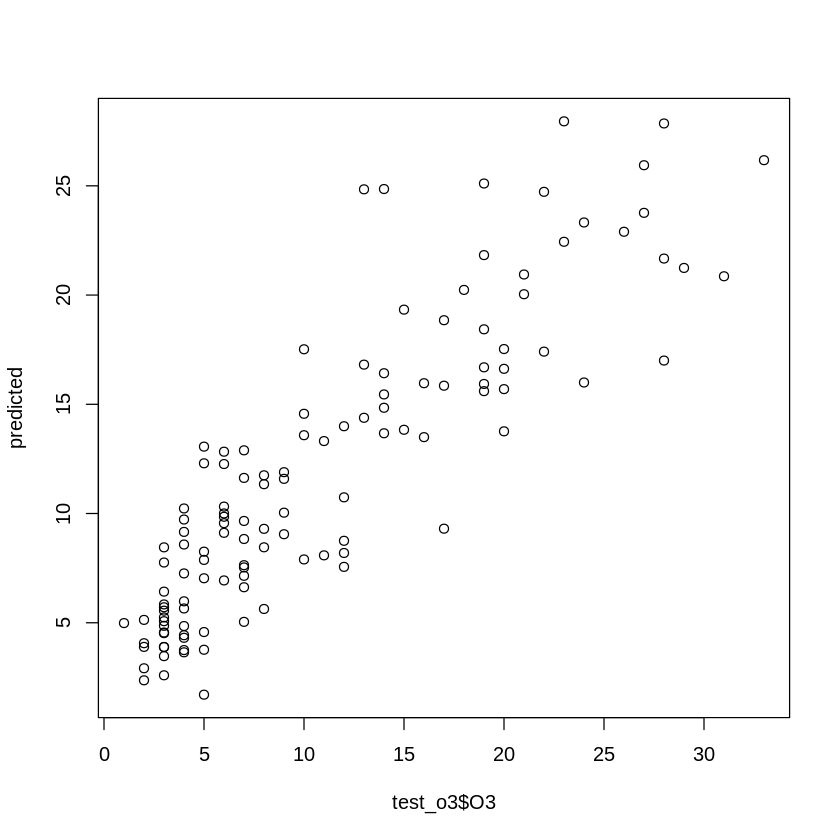

In [ ]:
# Results on the test set

predicted <- predict(model, test_o3[, -1], type="response")
# predicted <- ifelse(predicted_proba >= 0.5, 1, 0)
plot(test_o3$O3, predicted)


print(paste('R2 on the testset: ', r2(test_o3$O3, predicted)))

## Michaelis-Menten regression model
<br>
This model is a popular model in biochemistry, used for modeling enzyme kinetics. The equation used in this model describes the rate of enzymatic reactions by relating the reaction rate to the concentration of a substrate:

$
v = \frac{V_{max}[S]}{K_M + [S]}
$
<br>
<br>
$V_{max}$- the maximum achieve rate <br>
$K_M$ -  Michaelis constant<br>
$[S]$s - the concentration of the substrate<br>
$v$ - the rate of the enzymatic reaction<br>

In [ ]:
# let's try some example
library(dplyr)

# initial_concentration
x <- 1:10 # substrate concentrations for this example
# rate
y <- c(142.5881, 197.7911, 221.6461, 239.3364, 246.4013, 
     256.5914, 256.1170, 262.9451, 270.5476, 268.5552) # The example rates of reaction

data <- tibble(x, y)
head(data, 5)

x,y
<int>,<dbl>
1,142.5881
2,197.7911
3,221.6461
4,239.3364
5,246.4013


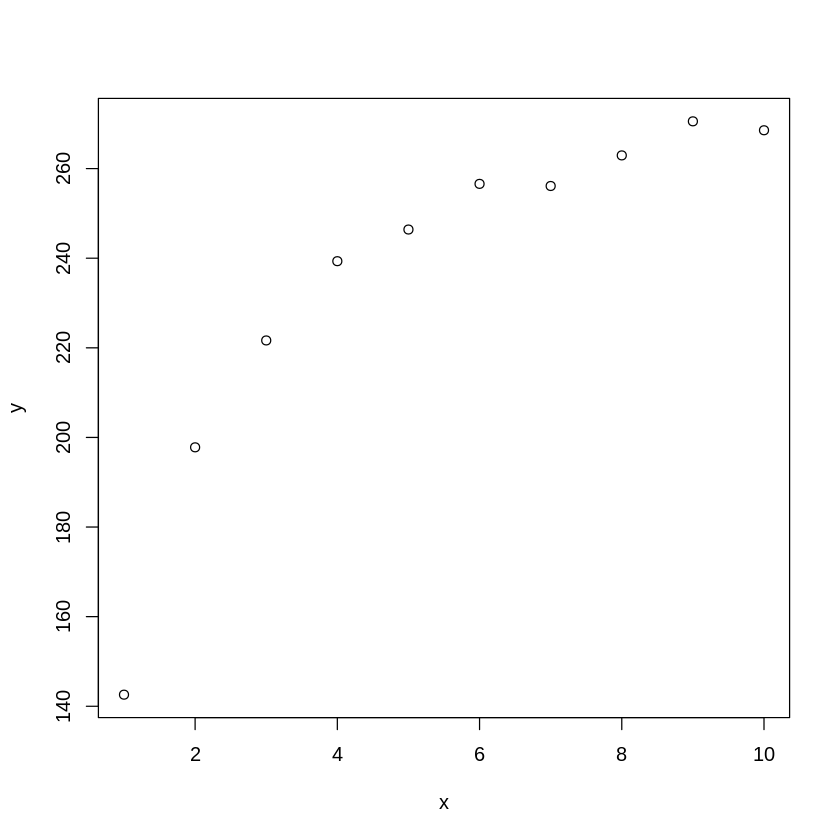

In [ ]:
# our equation is y = Vmax*x / (KM + x) 
# We need an estimate of starting (odhad pocatecnich) a and b values
# let's look at the data and try to find suitable values
# Vmax should be slightly above y, and KM somewhere around x values

plot(x, y)

Nonlinear Least Square function - nls()<br>
The nls() function in R is used for fitting non-linear models using non linear least square method.

In [ ]:
# https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/nls

model <- nls(y~Vmax*x/(KM+x), start=list(KM=5, Vmax=300))
model

Nonlinear regression model
  model: y ~ Vmax * x/(KM + x)
   data: parent.frame()
     KM    Vmax 
  1.057 299.204 
 residual sum-of-squares: 53.35

Number of iterations to convergence: 5 
Achieved convergence tolerance: 6.826e-06

In [ ]:
confint(model)

Waiting for profiling to be done...



,2.5%,97.5%
KM,0.973144,1.146852
Vmax,294.373742,304.202952


Warning message in method(formula, data = data, weights = weight):
“No starting values specified for some parameters.
Initializing ‘Vmax’, ‘KM’ to '1.'.
Consider specifying 'start' or using a selfStart model”


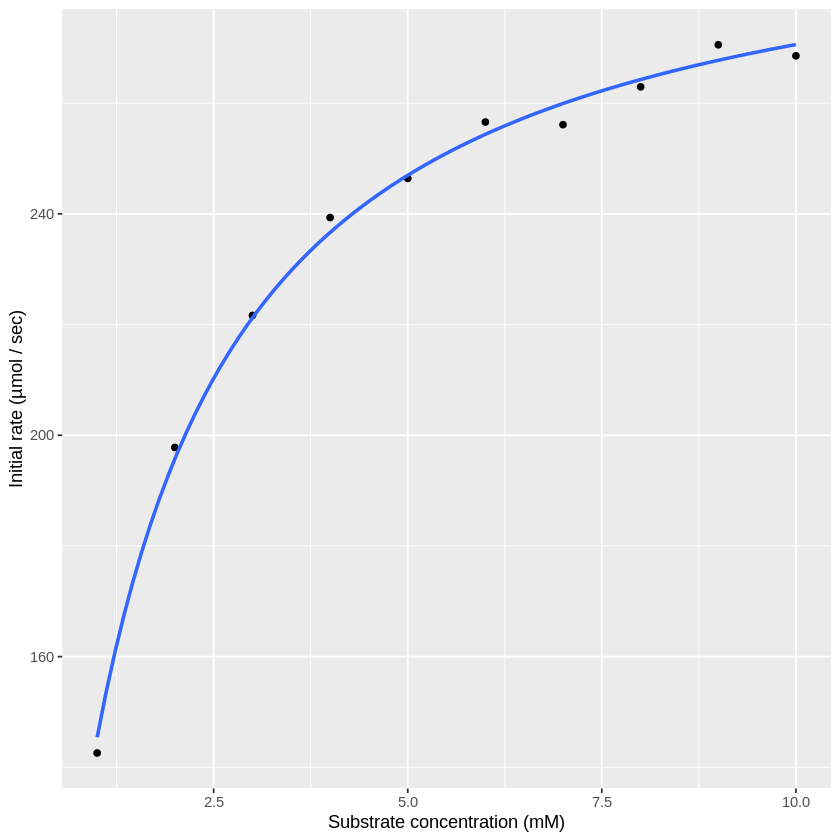

In [ ]:
library(ggplot2)

ggplot(data, aes(x, y)) +
        geom_point() +
        labs(x = "Substrate concentration (mM)", y = "Initial rate (µmol / sec)") +
        geom_smooth(method="nls",formula=y~Vmax*x/(KM+x), se=F)

Exercise:
<br>
The following table contains data that again describe the course of the enzymatic reaction. The first column contains the concentration values, the second and third contain two sets of measurements of the reaction rate, the last two are two sets of measurements but with the inhibitor added. Estimate the parameters for the Michalis-Menten equation and compare the parameters for the two cases, that is, the uninhibited measurements and with the added inhibitor. 

In [1]:
url <- 'https://raw.githubusercontent.com/kamclar/statisticka_analyza_dat_cviceni/main/data/kinetics.txt'
df <- read.table(url, header=T)
df

c,m1,m2,inh_m1,inh_m2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.56,0.58,0.37,0.39
2,0.95,0.94,0.50,0.48
3,1.21,1.19,0.57,0.55
4,1.38,1.38,0.60,0.60
5,1.54,1.51,0.62,0.61


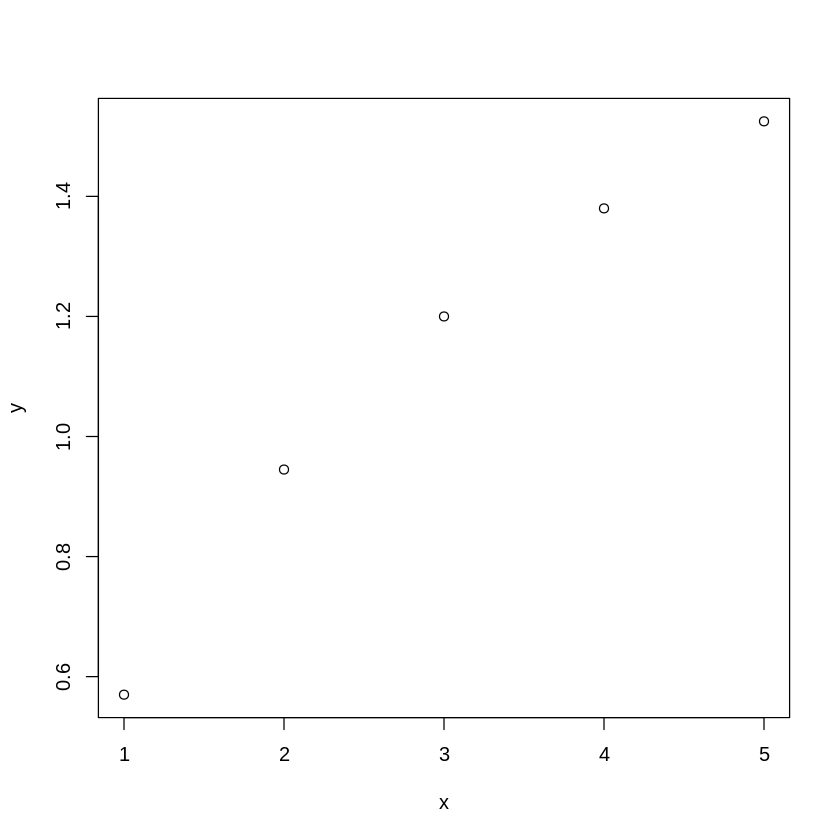

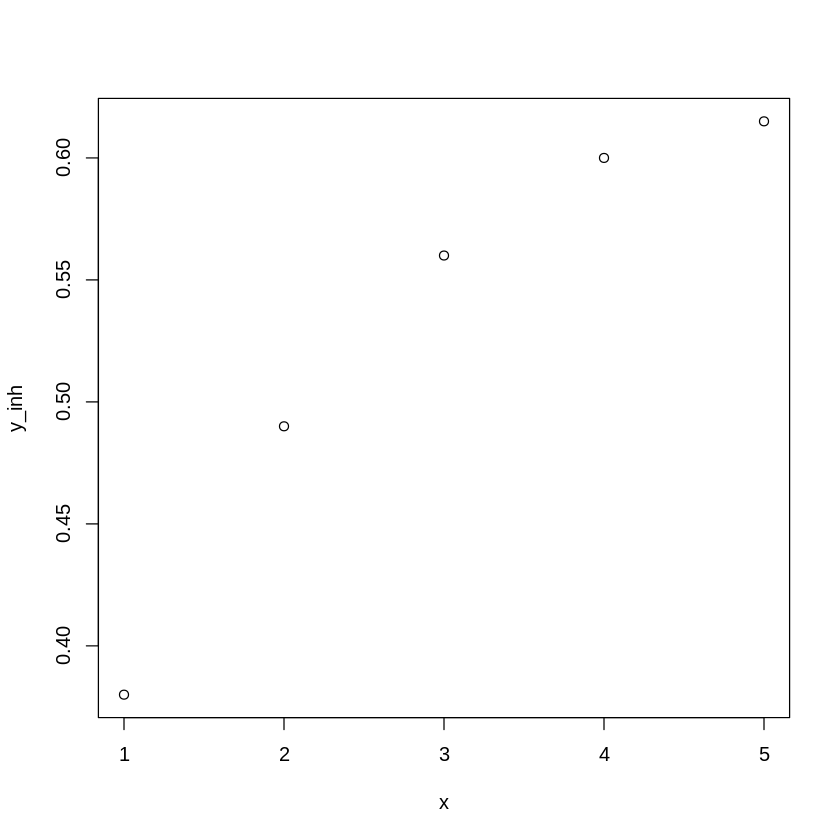

In [2]:
x <- df$c
y <- (df$m1 + df$m2)/2

y_inh <- (df$inh_m1 + df$inh_m2)/2

plot(x, y)
plot(x, y_inh)

In [3]:
model <- nls(y~Vmax*x/(KM+x), start=list(KM=2, Vmax=2))
model

model_inh <- nls(y_inh~Vmax*x/(KM+x), start=list(KM=2, Vmax=1))
model_inh

Nonlinear regression model
  model: y ~ Vmax * x/(KM + x)
   data: parent.frame()
   KM  Vmax 
3.522 2.600 
 residual sum-of-squares: 5.897e-05

Number of iterations to convergence: 4 
Achieved convergence tolerance: 5.443e-07

Nonlinear regression model
  model: y_inh ~ Vmax * x/(KM + x)
   data: parent.frame()
    KM   Vmax 
0.9566 0.7362 
 residual sum-of-squares: 0.0001247

Number of iterations to convergence: 5 
Achieved convergence tolerance: 3.909e-07

From the resulting estimates of the equation parameters it is possible to determine what type of inhibitor is involved - competitive, acompetitive or non-competitive. If there is a decrease in the paremeter, we can assume that it is an acompetitive inhibition.
<br>
Competitive - Only $K_M$ value decreases
<br>
Acompetitive - both parameters values decrease
<br>
Non-competitive - Only $V_max$ value decreases

Now we can compare both models using ANOVA:


In [4]:
 xs <- c(x, x)
 ys <- 
data <- data.frame(c(x, x),
                     c(y, y_inh),
                     c(rep(0, 5), rep(1, 5)))
colnames(data) <- c('x', 'y', 'is_inh')
data                 

x,y,is_inh
<dbl>,<dbl>,<dbl>
1,0.570,0
2,0.945,0
3,1.200,0
4,1.380,0
5,1.525,0
1,0.380,1
2,0.490,1
3,0.560,1
4,0.600,1


In [15]:
# we can treat this data using an equation with two variables
model <- nls(y ~ (Vmax + Vmax_d*is_inh) * x /((KM + KM_d*is_inh) + x), data=data, start=list(KM=2, KM_d=2, Vmax=1, Vmax_d=1))
model

Nonlinear regression model
  model: y ~ (Vmax + Vmax_d * is_inh) * x/((KM + KM_d * is_inh) + x)
   data: data
    KM   KM_d   Vmax Vmax_d 
 3.522 -2.565  2.600 -1.864 
 residual sum-of-squares: 0.0001836

Number of iterations to convergence: 7 
Achieved convergence tolerance: 1.874e-07

In [16]:
summary(model)


Formula: y ~ (Vmax + Vmax_d * is_inh) * x/((KM + KM_d * is_inh) + x)

Parameters:
       Estimate Std. Error t value Pr(>|t|)    
KM      3.52188    0.07685   45.83 7.23e-09 ***
KM_d   -2.56524    0.08923  -28.75 1.17e-07 ***
Vmax    2.60025    0.02897   89.76 1.29e-10 ***
Vmax_d -1.86400    0.03041  -61.29 1.27e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005532 on 6 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 1.874e-07


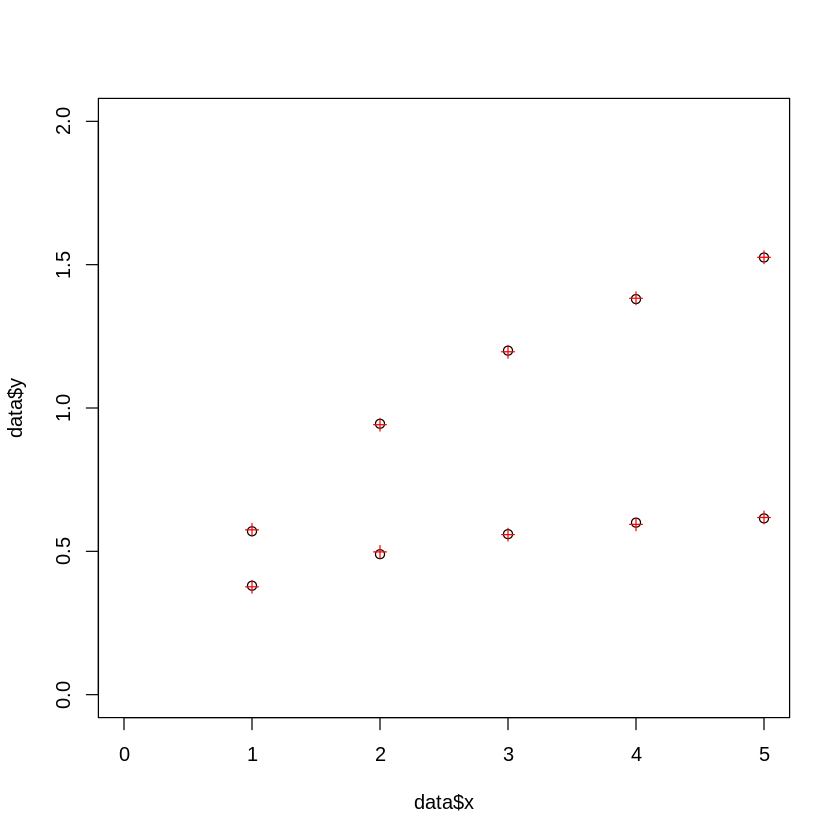

In [20]:
plot(data$x, data$y, xlim=c(0,5), ylim=c(0,2))
points(data[,1], (coef(model)["Vmax"]+coef(model)["Vmax_d"]*data$is_inh)*data$x/
((coef(model)["KM"]+coef(model)["KM_d"]*data$is_inh)+data$x), pch=3, col="red")


In [21]:
model_comp <- nls(y ~ Vmax * x /((KM + KM_d*is_inh) + x), data=data, start=list(KM=2, KM_d=2, Vmax=1))
model_comp

Nonlinear regression model
  model: y ~ Vmax * x/((KM + KM_d * is_inh) + x)
   data: data
   KM  KM_d  Vmax 
2.989 7.957 2.393 
 residual sum-of-squares: 0.07071

Number of iterations to convergence: 6 
Achieved convergence tolerance: 2.128e-06

In [22]:
summary(model_comp)


Formula: y ~ Vmax * x/((KM + KM_d * is_inh) + x)

Parameters:
     Estimate Std. Error t value Pr(>|t|)    
KM     2.9891     1.1323   2.640 0.033427 *  
KM_d   7.9570     1.9959   3.987 0.005279 ** 
Vmax   2.3934     0.4311   5.552 0.000858 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1005 on 7 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 2.128e-06


In [23]:
anova(model, model_comp)

,Res.Df,Res.Sum Sq,Df,Sum Sq,F value,Pr(>F)
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,6,0.0001836325,NA,NA,NA,NA
2,7,0.0707143546,-1,-0.07053072,2304.517,5.477716e-09


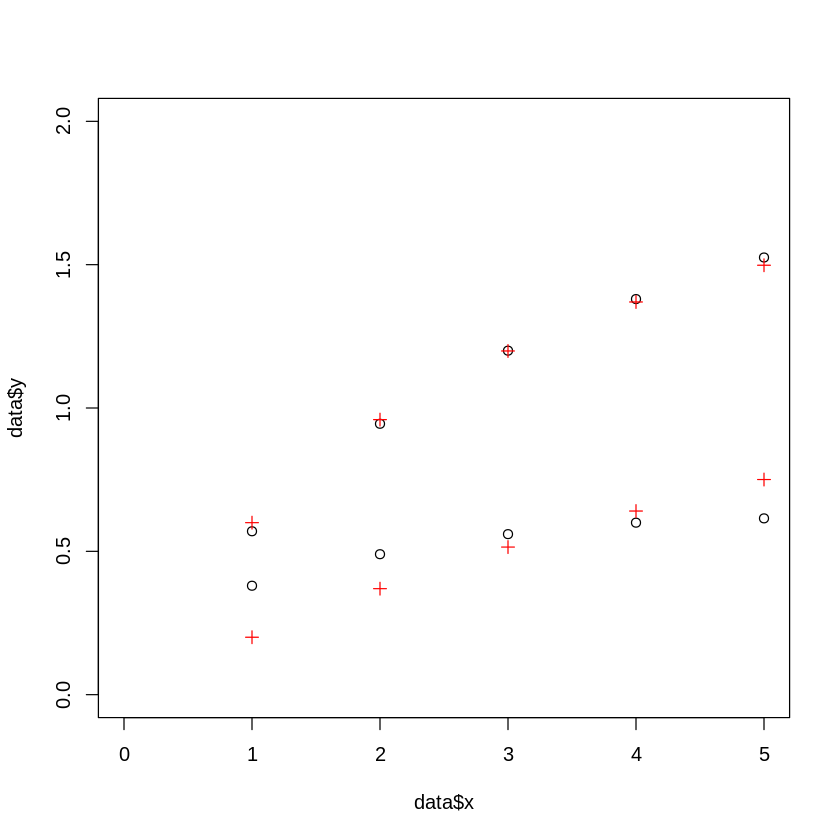

In [29]:
plot(data$x, data$y, xlim=c(0,5), ylim=c(0,2))
points(data$x, 
      (coef(model_comp)["Vmax"])*data$x/
      ((coef(model_comp)["KM"]+coef(model_comp)["KM_d"]*data$is_inh)+data$x), pch=3, col="red")


In [14]:
# Let's model non-competitive inhibition

model_ncomp <- nls(y ~ (Vmax + Vmax_d*is_inh) * x  /(KM + x), data=data, start=list(KM=2, Vmax_d = 1, Vmax=1))
model_ncomp
summary(model_ncomp)

Nonlinear regression model
  model: y ~ (Vmax + Vmax_d * is_inh) * x/(KM + x)
   data: data
    KM Vmax_d   Vmax 
 2.808 -1.274  2.334 
 residual sum-of-squares: 0.02102

Number of iterations to convergence: 6 
Achieved convergence tolerance: 1.079e-06


Formula: y ~ (Vmax + Vmax_d * is_inh) * x/(KM + x)

Parameters:
       Estimate Std. Error t value Pr(>|t|)    
KM       2.8080     0.5279   5.319   0.0011 ** 
Vmax_d  -1.2743     0.1283  -9.934 2.23e-05 ***
Vmax     2.3337     0.2040  11.439 8.76e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0548 on 7 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 1.079e-06


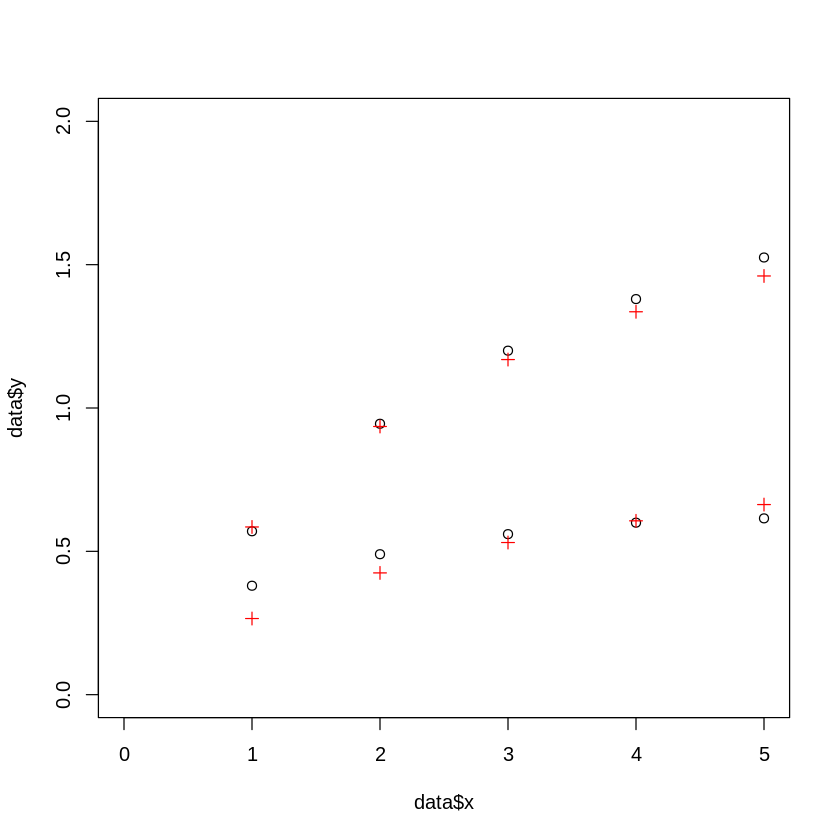

In [34]:
plot(data$x, data$y, xlim=c(0,5), ylim=c(0,2))
points(data$x,
      (coef(model_ncomp)["Vmax"]+coef(model_ncomp)["Vmax_d"]*data$is_inh)*data$x/
      (coef(model_comp)["KM"]+data$x), pch=3, col="red")


In [35]:
anova(model, model_ncomp)

,Res.Df,Res.Sum Sq,Df,Sum Sq,F value,Pr(>F)
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,6,0.0001836325,NA,NA,NA,NA
2,7,0.0210235559,-1,-0.02083992,680.9226,2.089335e-07


Comparisons of models using ANOVA tells us, that the models differs significantly. From the Res.Sum Sq column in printed summary, we can also see that the first model, that has both parameters Kmax an KM decreased in inhibited reaction, also tells us that the inhibition is acompetitive.